#### Dataset Link: Dataset Link : https://bit.ly/3n7Y76C

### Importing Require Library

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import seaborn as sns 
import plotly.io as pio
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\User\Desktop\rishabh\Nobel_Prize_Distribution_Dataset.csv')

In [4]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",01-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,01-03-1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",01-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,07-09-1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",01-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,31-03-1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,01-Feb,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,30-10-1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,01-Feb,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,12-06-1912,Paris,France


In [5]:
df.tail()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",01-Jan,927,Individual,Yoshinori Ohsumi,09-02-1945,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",01-Jan,934,Individual,Juan Manuel Santos,10-08-1951,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",01-Feb,928,Individual,David J. Thouless,21-09-1934,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",01-Apr,929,Individual,F. Duncan M. Haldane,14-09-1951,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
968,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",01-Apr,930,Individual,J. Michael Kosterlitz,22-06-1943,Aberdeen,United Kingdom,Male,Brown University,"Providence, RI",United States of America,NaN,NaN,NaN


### Some basic information about the dataset

In [6]:
df.info

<bound method DataFrame.info of      Year    Category                                           Prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
964  2016    Medicine  The Nobel Prize in Physiology or Medicine 2016   
965  2016       Peace                      The Nobel Peace Prize 2016   
966  2016     Physics                 The Nobel Prize in Physics 2016   
967  2016     Physics                 The Nobel Prize in Physics 2016   
968  2016     Physics                 The Nobel Prize in Physics 2016   

                                            Motivation Prize Share  \
0    "in recognition 

In [7]:
df.describe

<bound method NDFrame.describe of      Year    Category                                           Prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
964  2016    Medicine  The Nobel Prize in Physiology or Medicine 2016   
965  2016       Peace                      The Nobel Peace Prize 2016   
966  2016     Physics                 The Nobel Prize in Physics 2016   
967  2016     Physics                 The Nobel Prize in Physics 2016   
968  2016     Physics                 The Nobel Prize in Physics 2016   

                                            Motivation Prize Share  \
0    "in recognitio

### Data Preprocessing

In [8]:
df.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

#### Add feature Decade
Adding a feature to the dataset indicating the the respective 'Decade' per record based on the 'Year' the Nobel prize was awarded.

In [9]:
df['Decade'] = df['Year'].apply(lambda x: np.floor(x / 10) * 10).astype(int)
print(f'Unique values for added Decade in the dataset: {df.Decade.unique()}')

Unique values for added Decade in the dataset: [1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010]


#### Add feature Age

Adding a feature to the dataset indicating the respective 'Age' per record based on 'Birth Date' and the 'Year' the Nobel prize was awarded. In addition each record is allocated to an 'Age_Group' based on the calculated 'Age'

In [10]:
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
df['Age'] = df['Year'] - df['Birth Date'].dt.year
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 17, 65, 99],
                               labels=['Youth', 'Adult', 'Senior'])

print('Relative share of Nobel prize winners per added Age_Group:')
display(df['Age_Group'].value_counts(normalize=True, sort=False).to_frame())

Relative share of Nobel prize winners per added Age_Group:


,Age_Group
Youth,0.001066
Adult,0.675906
Senior,0.323028


### Data Visualization

#### Nobel prizes by age 

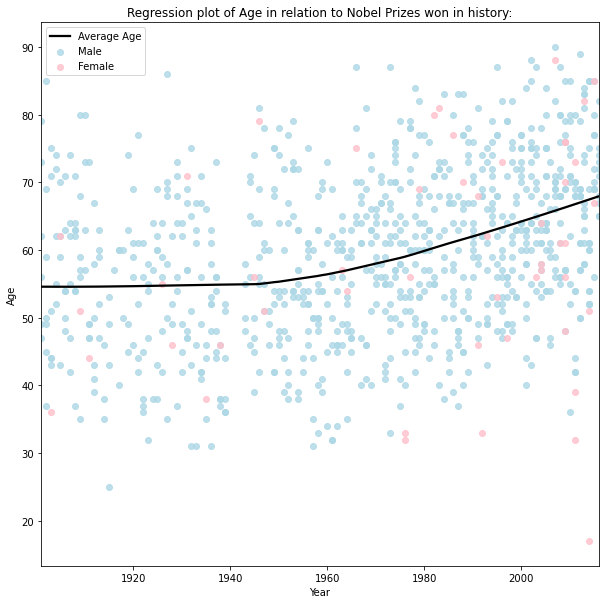

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(ax=ax, data=df, x='Year', y='Age', scatter=False, lowess=True, line_kws={'color': 'black'})
sns.regplot(ax=ax, data=df[df['Sex'] == 'Male']
            , x='Year', y='Age', lowess=True, fit_reg=False, color="lightblue")
sns.regplot(ax=ax, data=df[df['Sex'] == 'Female']
            , x='Year', y='Age', lowess=True, fit_reg=False, color="pink")

ax.set_title(f'Regression plot of Age in relation to Nobel Prizes won in history:')
ax.legend(labels=['Average Age', 'Male', 'Female'])

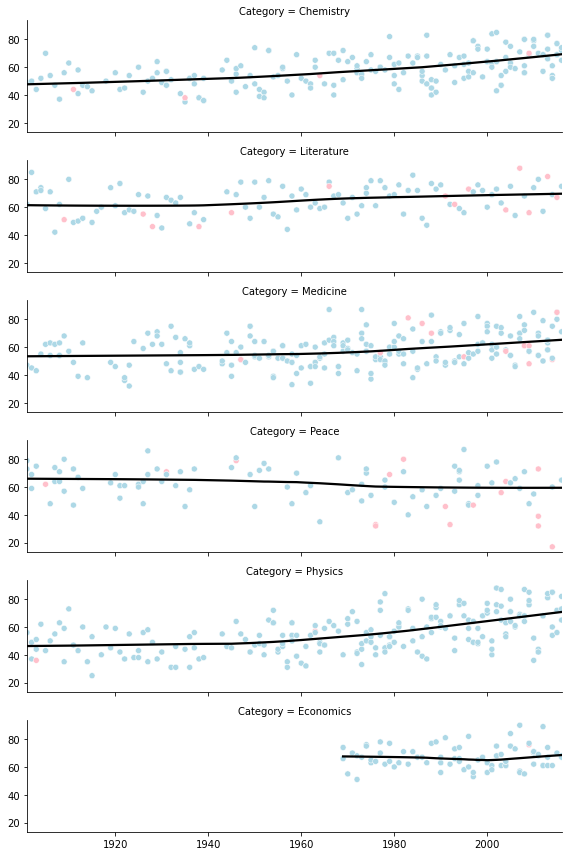

In [12]:
# Laureate Age per Category
g = sns.FacetGrid(df, row='Category', height=2, aspect=4)
g.map_dataframe(sns.regplot, x='Year', y='Age', scatter=False, lowess=True, line_kws={'color': 'black'})  # Only Lowess for Male/Female combined
g.map_dataframe(sns.scatterplot, x='Year', y='Age', hue='Sex', palette={"Male": "lightblue", "Female": "pink"})

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


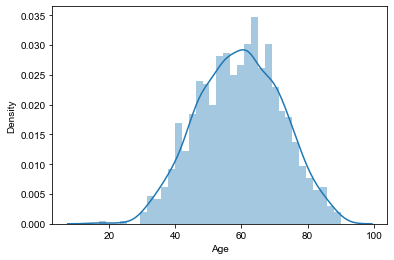

In [13]:
# Distribution of age
sns.distplot(df.Age.dropna(), bins=35)
sns.set(rc={"figure.figsize": (10, 5)})

### Results: 
1. The age group(52-70) which received the most no. of nobel prizes.

#### Oldest and Youngest Nobel Prize Winner

In [14]:
# The oldest winner of a Nobel Prize as of 2016
display(df.nlargest(1, 'Age'))

# The youngest winner of a Nobel Prize as of 2016
df.nsmallest(1, 'Age')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Decade,Age,Age_Group
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",01-Mar,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,Male,University of Minnesota,"Minneapolis, MN",United States of America,24-06-2008,"Minneapolis, MN",United States of America,2000,90.0,Senior


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Decade,Age,Age_Group
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",01-Feb,914,Individual,Malala Yousafzai,1997-12-07,Mingora,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,2010,17.0,Youth


### Finding the  continent is having most no. of nobel prize recipients.

In [15]:
top_10 =df['Birth Country'].value_counts().reset_index()
top_10 = top_10.sort_values('Birth Country', ascending=False).head(10)

In [19]:
import plotly.express as px
fig=go.Figure()
fig = px.bar(top_10, x='index',y='Birth Country', title = 'Top 10 Nobel Winning Countries')
fig.show()
pio.write_html(fig,file='figure.html',auto_open=True)
plt.savefig('foo.png')

<Figure size 720x360 with 0 Axes>

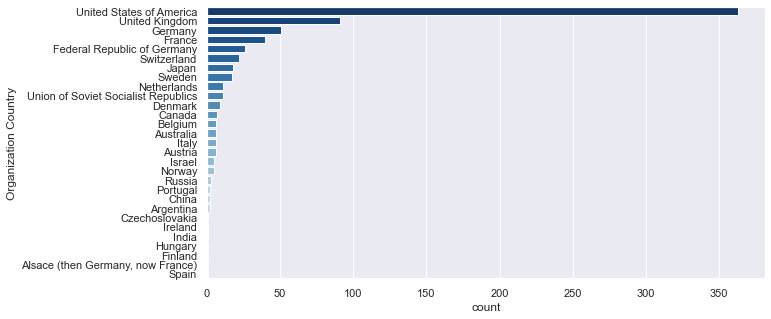

In [17]:
sns.countplot(y="Organization Country", 
              data=df,
              order=df["Organization Country"].value_counts().index,
              palette='Blues_r')
sns.set(rc={"figure.figsize": (20, 12)})

In [18]:
# Display the number of prizes won by the top 10 nationalities from 1901 to 2020
df['Birth Country'].value_counts().head(n=10)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

### Results:

1. The continent is having most no. of nobel prize recipients: United States of America(USA)

### Finding the trends in no. of nobel prizes received by each category in during 1900 to 2020

In [19]:
che_cat = df[df['Category'] == 'Chemistry']
lit_cat = df[df['Category'] == 'Literature']
med_cat = df[df['Category'] == 'Medicine']
pea_cat = df[df['Category'] == 'Peace']
phy_cat = df[df['Category'] == 'Physics']
eco_cat = df[df['Category'] == 'Economics']
che_gender = che_cat['Sex'].value_counts().reset_index()
lit_gender = lit_cat['Sex'].value_counts().reset_index()
med_gender = med_cat['Sex'].value_counts().reset_index()
pea_gender = pea_cat['Sex'].value_counts().reset_index()
phy_gender = phy_cat['Sex'].value_counts().reset_index()
eco_gender = eco_cat['Sex'].value_counts().reset_index()

In [20]:
fig=go.Figure()
fig.add_trace(go.Bar(x=che_gender['index'],y=che_gender['Sex'], name='Chemistry' ))
fig.add_trace(go.Bar(x=lit_gender['index'],y=lit_gender['Sex'], name='Literature'))
fig.add_trace(go.Bar(x=med_gender['index'],y=med_gender['Sex'], name='Medicine'))
fig.add_trace(go.Bar(x=pea_gender['index'],y=pea_gender['Sex'], name='Peace'))
fig.add_trace(go.Bar(x=phy_gender['index'],y=phy_gender['Sex'], name='Physics'))
fig.add_trace(go.Bar(x=eco_gender['index'],y=eco_gender['Sex'], name='Economics'))

fig.update_layout(barmode='group', title = 'Category Wise: Women vs. Men Nobel Prize Winners since 1900-2020')
fig.show()

In [18]:
pio.write_html(fig,file='figure.html',auto_open=True)

### Results:

1. For  male nobel laureates:
    
    a. Highest nobel prize recipients category: Physics
        
    b. Lowest nobel prize recipients category: Economics
    
        
2. For female nobel laureates:
    
    a. Highest nobel prize recipients category: Peace
    
    b. Lowest nobel prize recipients category: Physics & Economics